# __HEY!!! 👋👋__ 
# __THIS PROJECT AIMS TO PREDICT CANCER TYPE USING GENE EXPRESSION__ 

In [44]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Read data from excel file.

df = pd.read_csv('train.csv')

In [46]:
# Spliting the dataset into 2 sets of first 150 and next 250 elements

df1 = df.iloc[:150].copy()
df2 = df.iloc[150:].copy()    

### Now we analyse our data !!!

In [47]:
print(df1.shape)

(150, 14574)


In [77]:
df1.describe()

,gene_1,gene_3,gene_5,gene_7,gene_8,gene_9,gene_10,gene_11,gene_13,gene_14,...,gene_20634,gene_20635,gene_20636,gene_20637,gene_20638,gene_20639,gene_20640,gene_20641,gene_20642,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.105503,0.174310,0.122216,-0.033608,0.055635,0.013400,0.050186,0.045033,0.109700,-0.152896,...,-0.115262,-0.101433,-0.027796,0.037297,0.067865,-0.115622,-0.059375,-0.004146,-0.015942,1.940000
std,1.126133,1.106765,1.014197,0.944074,0.965860,0.908907,0.876534,0.998492,1.217894,1.026605,...,0.981365,0.985060,1.007918,0.903809,1.014511,0.998040,0.981708,0.885981,0.994216,1.301677
min,-2.268993,-1.897882,-3.255536,-2.853971,-5.737839,-4.079731,-1.672210,-1.798695,-3.206376,-5.329013,...,-4.137839,-3.406653,-3.624227,-3.221455,-2.652422,-4.904563,-4.187460,-2.437325,-2.448014,0.000000
25%,-0.567419,-0.514057,-0.253956,-0.557795,-0.279376,-0.364109,-0.467752,-0.568914,-0.436723,-0.485655,...,-0.713427,-0.612293,-0.612250,-0.387811,-0.394207,-0.738777,-0.583728,-0.520324,-0.504722,1.000000
50%,0.105503,-0.012587,0.081677,-0.041090,0.055449,-0.013570,-0.145414,-0.131438,-0.085431,-0.220448,...,-0.093270,-0.002530,0.066874,0.037297,0.061875,-0.069406,-0.059375,-0.004146,-0.015942,2.000000
75%,0.546297,0.677105,0.322543,0.307108,0.321449,0.309573,0.203658,0.350646,0.277890,0.132395,...,0.556499,0.557261,0.642406,0.376800,0.466803,0.450717,0.373683,0.516261,0.524574,3.000000
max,7.714353,6.495396,5.857435,4.697492,3.157187,5.116117,3.992366,4.962688,9.351831,4.598364,...,2.163729,2.137905,2.223640,2.592613,5.228401,2.777126,3.186559,1.756369,6.022439,4.000000


In [48]:
df1.head()

,Id,gene_1,gene_3,gene_5,gene_7,gene_8,gene_9,gene_10,gene_11,gene_13,...,gene_20634,gene_20635,gene_20636,gene_20637,gene_20638,gene_20639,gene_20640,gene_20641,gene_20642,Class
0,sample_664,0.160738,-0.327348,-0.144638,0.196493,-1.105093,0.309926,-0.177461,-1.124182,-0.459826,...,-1.611378,-1.108411,-0.670719,-1.739299,0.476467,1.136071,-0.576601,-1.275518,-0.508678,1.0
1,sample_215,-0.771173,0.885819,-0.234209,0.273139,0.132208,-0.249541,0.005817,-0.631647,NaN,...,0.247812,0.144035,0.148776,-1.373208,0.099245,0.391993,0.573363,0.322198,6.022439,0.0
2,sample_343,-0.169258,1.908618,0.165008,-0.562826,0.199720,0.128036,2.348450,2.425346,-0.933545,...,1.133065,0.965014,1.873753,-0.005167,-0.223091,0.782868,-0.562787,-0.471593,-0.763284,4.0
3,sample_707,-0.947912,0.111177,-0.153179,0.837412,0.185467,-0.066223,-0.267734,0.674365,-0.076086,...,0.022339,0.326506,-0.333964,0.228595,-0.245309,0.478564,0.273364,1.756369,-0.266200,1.0
4,sample_621,-0.335741,0.515251,0.325440,-0.842387,-0.500415,0.484240,-0.438587,-0.874562,NaN,...,-1.516812,-1.430622,-0.664933,-0.753410,NaN,0.375521,-0.536705,-0.523850,0.222560,4.0


In [49]:
df1.tail()

,Id,gene_1,gene_3,gene_5,gene_7,gene_8,gene_9,gene_10,gene_11,gene_13,...,gene_20634,gene_20635,gene_20636,gene_20637,gene_20638,gene_20639,gene_20640,gene_20641,gene_20642,Class
145,sample_23,-0.112888,-0.314359,0.077449,0.056247,0.103876,-0.728363,-0.623256,-0.514018,-0.094775,...,-2.034951,-1.044428,-0.612828,-0.355290,1.225805,NaN,-0.682255,-0.685444,0.508513,0.0
146,sample_736,0.553342,1.262399,NaN,0.239861,0.096321,NaN,3.992366,0.147238,-1.229599,...,-1.394686,-2.516524,-0.490575,0.205257,2.256965,-0.199951,-0.844636,-0.966199,0.243376,2.0
147,sample_296,-0.009626,-0.037677,0.517866,NaN,-0.251922,NaN,NaN,-0.976047,2.447487,...,-1.935600,0.224061,-0.263961,0.480482,-0.559723,0.553700,NaN,NaN,-0.492855,2.0
148,sample_254,0.496826,-0.370912,0.810453,-0.899891,-0.546651,-0.097277,NaN,-1.798695,-0.989344,...,0.444442,NaN,0.106861,-0.102471,-0.289916,-0.652349,0.115815,0.496736,0.387309,2.0
149,sample_148,1.114288,0.521903,-0.091113,0.004899,-0.275848,-0.261569,0.166877,-0.407369,0.354357,...,0.090921,0.324998,0.297727,-1.073918,0.032257,1.424376,0.365296,1.422218,0.628566,0.0


In [50]:
# Finding number of columns with missing values

nullval = (df1.isnull().sum() > 0).sum()
print(f'No. of columns containing missing values : {nullval}')

No. of columns containing missing values : 14572


In [51]:
df1.iloc[0:0, 0:1]

,Id


In [52]:
df1.iloc[0:0, -1:]

,Class


Class
2.0    56
4.0    27
1.0    26
0.0    26
3.0    15
Name: count, dtype: int64
Number of null values in class column : 0


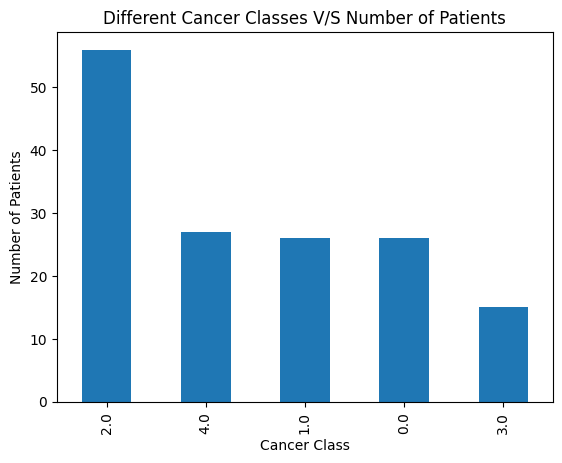

In [ ]:
# We determine the Value Count of Class and plot it against the Number of Patients of each class.

print(df1['Class'].value_counts())
print(f'Number of null values in class column : {df1['Class'].isnull().sum()}')
df1['Class'].value_counts().plot.bar()
plt.title('Different Cancer Classes V/S Number of Patients')
plt.xlabel("Cancer Class")
plt.ylabel("Number of Patients")
_ = plt.show()

In [54]:
# As all the 150 values are labeled thus there are no null values in class column of first 150 elements.

In [55]:
# Now we replace all the null values with the mean value of that respective column except the last column as there are no null values in it.

df1[df1.columns[:-1]] = df1[df1.columns[:-1]].fillna(df1[df1.columns[:-1]].mean(numeric_only=True))

In [56]:
# Now we seperate feature values from the Class and also we remove the first column as it just contains sample number in string form.

X = df1.iloc[:,1:-1]
y = df1.iloc[:,-1]

In [57]:
# Now we split the dataset into test and training datasets with a 20% test data size.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [58]:
# Now we normalize our features in training and testing data so as to increase performance and decrease bias.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_nor = scaler.fit_transform(X_train)
X_test_nor = scaler.transform(X_test)

The selected features are :- 
 Index(['gene_30', 'gene_48', 'gene_83', 'gene_91', 'gene_180', 'gene_226',
       'gene_290', 'gene_355', 'gene_378', 'gene_439',
       ...
       'gene_19201', 'gene_19236', 'gene_19296', 'gene_19313', 'gene_19373',
       'gene_19430', 'gene_19440', 'gene_19648', 'gene_19913', 'gene_20416'],
      dtype='object', length=300) 

Top 300 most relevant features V/S their MI Score:
        Feature  MI Score
0     gene_5944  0.595278
1    gene_13976  0.591032
2      gene_628  0.586472
3     gene_3524  0.553411
4    gene_16130  0.551294
..          ...       ...
295  gene_11868  0.328468
296    gene_226  0.328193
297   gene_2167  0.327888
298   gene_1788  0.327696
299  gene_12268  0.327499

[300 rows x 2 columns]


Here is the Plot of Top 50 features V/S their MI Score 



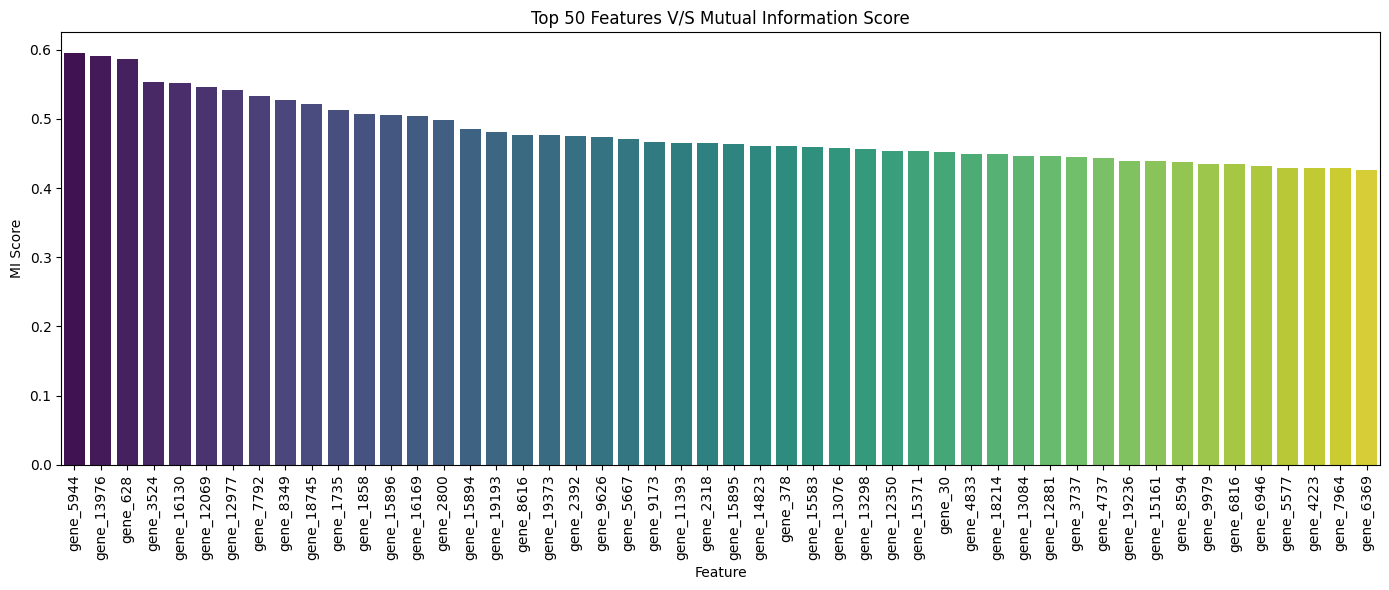

In [59]:
# Since there are 14572 features, we need to pick the most relevent ones. Thus, we select top 300 most relevent features.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(score_func = mutual_info_classif, k = 300)
X_train_selected = selector.fit_transform(X_train_nor, y_train)
X_test_selected = selector.transform(X_test_nor)
selected_scores_indices = selector.get_support(indices = True)

scores = selector.scores_
mask = selector.get_support()
selected_features = X_train.columns[mask]
print(f'The selected features are :- \n {selected_features} \n')

# Here is 300 most relevant features V/S their MI Scores.

print("Top 300 most relevant features V/S their MI Score:")
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': scores
})
top_features = mi_scores[mask].sort_values(by = 'MI Score', ascending = False)
print(top_features.reset_index(drop = True))
print('\n')

# Here is the bar plot of top 50 most relevant features V/S their MI Score.

top_50_features = top_features.head(50)
plt.figure(figsize = (14, 6))
sns.barplot(data = top_50_features, x = 'Feature', y = 'MI Score', hue = 'Feature', palette = 'viridis', legend = False)
plt.xticks(rotation = 90)
print('\033[1mHere is the Plot of Top 50 features V/S their MI Score\033[0m \n')
plt.title('Top 50 Features V/S Mutual Information Score')
plt.xlabel('Feature')
plt.ylabel('MI Score')
plt.tight_layout()
_ = plt.show()

In [60]:
print(f'X train selected shape : {X_train_selected.shape}')
print(f'X test selected shape : {X_test_selected.shape}')

X train selected shape : (120, 300)
X test selected shape : (30, 300)


#### Now our data is ready to fit into various models. 
#### Particularly we will use 2 models here on our data.
#### 1). Random Forest Classifier
#### 2). Logistic Regression

## <div style="text-align: center"> Using Random Forest Classifier </div>

In [61]:
# We are using Random Forest Classifier in which we will be using ONE V/S REST as there is Multidimensional Dataset.

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_predRF =RF.predict(X_test_selected)
pred_probRF = RF.predict_proba(X_test_selected)

In [62]:
# Now, we check the model's accuracy and report to see its precision, recall and the f1 score of different classes. 

from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report

accRF = np.round(balanced_accuracy_score(y_test, y_predRF), 2)
print('Model Accuracy :- %0.2f%% \n' % (accRF * 100))

unique_classes = sorted(set(y_test))
class_names = [str(cls) for cls in unique_classes]

reportRF = classification_report(y_test,y_predRF, target_names=class_names)
print('Classification Report \n')
print(reportRF)

Model Accuracy :- 95.00% 

Classification Report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      0.75      0.86         4
         2.0       0.92      1.00      0.96        11
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00         6

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



## We can see how well our model is performing :))

In [63]:
# Now we draw a confusion matrix to see our model's prediction V/S actual value.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

labels = label_encoder.classes_
cmatRF = confusion_matrix(y_test, y_predRF)
conMatRF = pd.DataFrame(cmatRF, index=labels, columns=labels)
conMatRF

,0.0,1.0,2.0,3.0,4.0
0.0,6,0,0,0,0
1.0,0,3,1,0,0
2.0,0,0,11,0,0
3.0,0,0,0,3,0
4.0,0,0,0,0,6


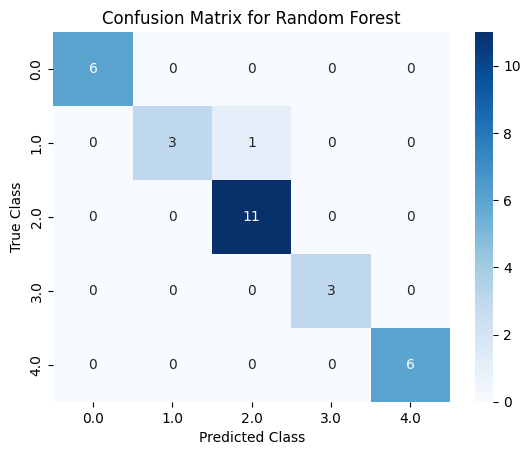

In [64]:
# Visualizing the Confusion Matrix using seaborn.

sns.heatmap(conMatRF, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
_ = plt.show()

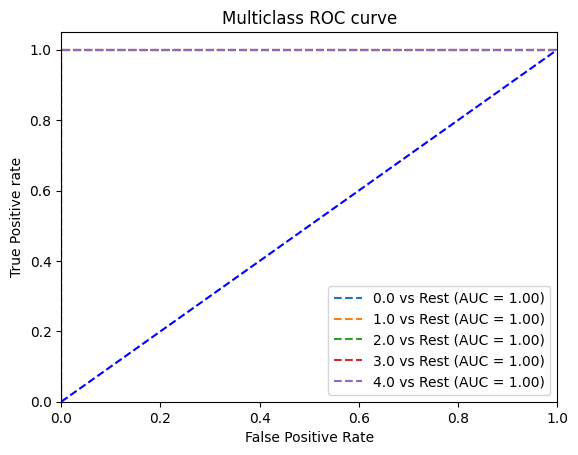

In [80]:
# ROC curves will be generated for each class.
# We will therefore have to binarize/one-hot encode the y_test labels. 
# This is done because the probabilities(pred_probRF) are calculated for each each class.
# We therefore need to put the y_test label in the same format as the pred_probRF.

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_encoded = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y_encoded)

y_test_binarized = label_binarize(y_test,classes=classes)

# ROC curve for classes

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_probRF[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting   
     
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label = '%s vs Rest (AUC = %0.2f)' %(labels[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc = 'lower right')
_ = plt.show()   

In [66]:
# Loading test data (401 samples for prediction)

test_df = pd.read_csv('test.csv')
ids = test_df.iloc[:, 0]
print(f"Test data shape: {test_df.shape}")
print(f"Columns: Id + {test_df.shape[1]-1} gene features")

Test data shape: (401, 14573)
Columns: Id + 14572 gene features


In [67]:
# We replace all the null values with the mean value of that respective column except the first column.

test_df.iloc[:, 1:] = test_df.iloc[:, 1:].fillna(test_df.iloc[:, 1:].mean(numeric_only = True))

In [68]:
# Now we normalize our testing dataset features and predict on behalf of those 300 most relevant features which we chosen during training our model.

test_ids = test_df.iloc[:, 0]  
X_testing_raw = test_df.iloc[:, 1:]

X_testing_norm = scaler.transform(X_testing_raw)

X_testing_selected = selector.transform(X_testing_norm)

y_predRFtest = RF.predict(X_testing_selected)

In [78]:
# Creating a submission file with Columns - Id and Class (Predicted).

submission1 = pd.DataFrame({
    'Id': test_ids,
    'Class': y_predRFtest
})
submission1["Class"] = submission1["Class"].astype(int)

submission1.to_csv('submission_RUCHIR_SHARMA_RF.csv', index = False)

print("\033[1mSubmission file created!\033[0m")
print(f"Submission shape: {submission1.shape}")

Submission file created!
Submission shape: (401, 2)


## <div style="text-align: center"> Using Logistic Regression </div>

In [70]:
# We are using Random Logistic Regression in which we will be using ONE V/S REST as there is Multidimensional Dataset.

from sklearn.linear_model import LogisticRegression

LR = OneVsRestClassifier(RandomForestClassifier(max_features = 0.2))
LR.fit(X_train_selected,y_train)
y_predLR =LR.predict(X_test_selected)
pred_probLR = LR.predict_proba(X_test_selected)

In [71]:
# Now, we check the model's accuracy and report to see its precision, recall and the f1 score of different classes. 

accLR = np.round(balanced_accuracy_score(y_test, y_predLR), 2)
print('Model Accuracy :- %0.2f%% \n' % (accLR * 100))

reportLR = classification_report(y_test,y_predLR, target_names=class_names)
print('Classification Report \n')
print(reportLR)

Model Accuracy :- 100.00% 

Classification Report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         4
         2.0       1.00      1.00      1.00        11
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## This model is performing well too :)))

In [72]:
# Now we draw a confusion matrix to see our model's prediction V/S actual value.

labels = label_encoder.classes_
cmatLR = confusion_matrix(y_test, y_predLR)
conMatLR = pd.DataFrame(cmatLR, index=labels, columns=labels)
conMatLR

,0.0,1.0,2.0,3.0,4.0
0.0,6,0,0,0,0
1.0,0,4,0,0,0
2.0,0,0,11,0,0
3.0,0,0,0,3,0
4.0,0,0,0,0,6


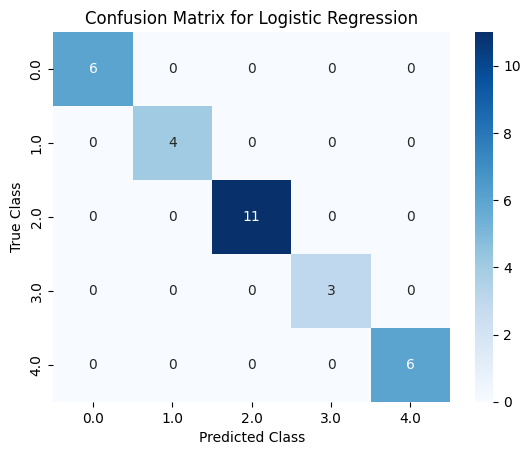

In [73]:
# Visualizing the Confusion Matrix using seaborn.

sns.heatmap(conMatLR, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
_ = plt.show()

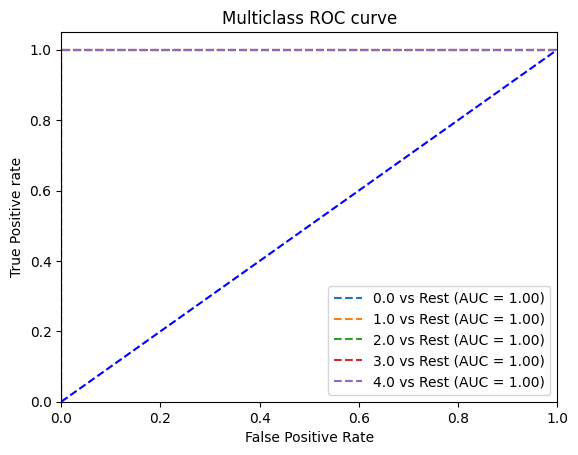

In [81]:
# Now, we will plot ROC curves for each class.

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_encoded = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y_encoded)

y_test_binarized = label_binarize(y_test, classes = classes)

# ROC curve for classes

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_probLR[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting   
     
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label = '%s vs Rest (AUC = %0.2f)' %(labels[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc = 'lower right')
plt.show()   

In [79]:
# Now, we predict using Logistic Regression and create a submission file with Columns - Id and Class (Predicted).

y_predLRtest = LR.predict(X_testing_selected)

submission1 = pd.DataFrame({
    'Id': test_ids,
    'Class': y_predLRtest
})
submission1["Class"] = submission1["Class"].astype(int)

submission1.to_csv('submission_RUCHIR_SHARMA_LR.csv', index = False)

print("\033[1mSubmission file created!\033[0m")
print(f"Submission shape: {submission1.shape}")

Submission file created!
Submission shape: (401, 2)
